# Sobre Scikit-Learn

[Scikit-Learn](https://scikit-learn.org/stable/) é uma biblioteca Python desenvolvida para dar acesso aos mais conhecidos algoritmos de Machine Learning com código Python, através de uma limpa e inteligente API. Ela foi construída por centenas de contribuidores ao redor do globo e é muito utilizado pela indústria e academia científica.

Scikit-Learn é construída em cima das bibliotecas [NumPy](https://www.numpy.org/) (Numerical Python) e [SciPy](https://www.scipy.org/) (Scientific Python), no qual nos possibilita uma computação numérica eficiente dentro do Python.

# O que é Machine Learning?

Machine Learning pode ser considerado um sub-campo da **Inteligência Artificial** uma vez que esses algoritmos podem ser vistos comos os blocos de construção para fazerem computadores aprender a se comportarem com mais inteligência através da generalização ao invés de somente guardar e recuperar itens de dados como um sistema de banco de dados faria.

# Representação de Dados em Scikit-Learn

Machine Learning é sobre criar modelos através de dados: por essa razão, nós começaremos discutindo como dados podem ser representados de forma a serem entendidos pelo computador.

A maioria dos algoritmos implementados em Scikit-Learn esperam que os dados estejam guardados em uma **array ou matriz de duas-dimensões**. Os arrays podem ser *numpy* arrays ou em alguns casos *scipy.sparse* matrizes. O tamanho do array é esperado a ser \[n_amostras, n_caracteristicas\] 

- **n_amostras:** O número de amostras: cada amostra é um item a ser processado. Uma amostra pode ser um documento, uma figura, um som, um vídeo, um objeto astronômico, uma linha em uma base de dados ou arquivo CSV, ou qualquer coisa que você possa descrever com um conjunto fixo de peculiaridades quantitativas.
- **n_caracteristicas:** O número de características ou peculiaridades distintas que podem ser usados para descrever cada item em uma maneira quantitativa. Características são geralmente de valor real, porém podem ser booleanos ou valores discretos em alguns casos

# Carregando o Conjunto de Dados Iris com Scikit-Learn

Scikit-learn possui um conjunto de dados muito interessante para iniciantes a respeito da espécie de flores iris. 

Os dados consistem:

- Características do conjunto de dados Iris:
    1. Comprimento das sépalas em cm
    2. Largura das sépalas em cm
    3. Comprimento das pétalas em cm
    4. Largura das pétalas em cm
- Classes que desejamos prever:
    1. Iris Setosa
    2. Iris Versicolour
    3. Iris Virginica

In [23]:
# Carregando o conjunto de dados
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()

In [5]:
iris.keys() # Observando as chaves disponíveis

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
n_amostras, n_caracteristicas = iris.data.shape
print(n_amostras, n_caracteristicas) # 150 amostras e 4 características, ou seja, 150 flores e 4 medidas
print(iris.data[0]) # Imprime a primeira linha da matriz

150 4
[5.1 3.5 1.4 0.2]


In [9]:
print(iris.target) # Código numérico que nos diz qual espécie é

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


# O Objeto Estimador

Todos os algoritmos são expostos em Scikit-Learn através de um objeto "Estimador".

In [14]:
from sklearn.linear_model import LinearRegression

**Parâmetros do Estimador:** Todos os parâmetros de um estimador podem ser setados quando ele é instanciado e possuem valores padrões adequados

In [16]:
modelo = LinearRegression(normalize=True)
print(modelo.normalize)

True


In [17]:
print(modelo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


**Parâmetros de Modelo Estimado:** Quando os dados são ajustados em um estimador, parâmetros são estimados dos dados em mãos. Todos os parâmetros estimados são atributos do objeto estimador terminado por um *underscore*.

In [18]:
x = np.arange(10)
y = 2 * x + 1

In [19]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


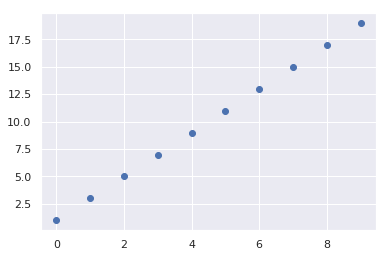

In [20]:
plt.plot(x,y,'o')

In [25]:
# Os dados de input para o scikit-learn é 2D: (amostras == 3 x características == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [26]:
# Ajusta o modelo em nossos dados
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [28]:
# *underscore* no final indica um parâmetro ajustado
print(modelo.coef_)
print(modelo.intercept_)

[2.]
1.0


Vamos agora trabalhar em um problema de classificação

In [34]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Cria um modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Ajusta o modelo
knn.fit(X, y)

# Que tipo de iris possui 3cm versus 5cm sépalas e 4cm x 2cm pétalas
# Chama o método 'predict'
resultado = knn.predict([[3,5,4,2],])

print(iris.target_names[resultado])

['versicolor']


Também podemos executar previsões probabilísticas

In [36]:
knn.predict_proba([[3,5,4,2],]) # Respectivamente 0% 80% e 20%

array([[0. , 0.8, 0.2]])

# Aplicação Rápida: Reconhecimento de Caractéres Ópticos

Carregando e visualizando os dados dígitos

In [42]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

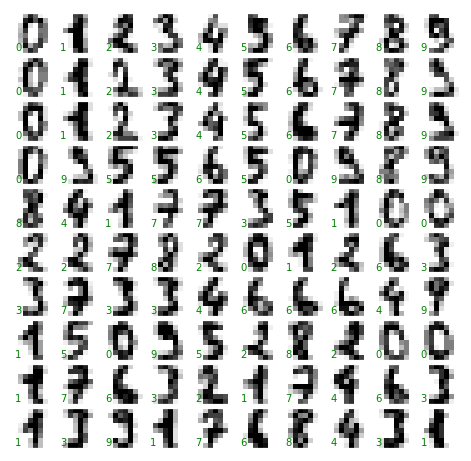

In [43]:
fig, axes = plt.subplots(10, 10, figsize=(8,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Cada item é uma imagem 8x8 pixels

In [44]:
# As imagens propriamente 
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [45]:
# O rótulo alvo (valor que desejamos prever)
print(digits.target)

[0 1 2 ... 8 9 8]


Sendo assim nossos dados possuem 1797 amostras em 64 dimensões

# Redução de dimensionalidade

In [46]:
from sklearn.manifold import Isomap

In [47]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)

In [48]:
data_projected.shape

(1797, 2)